<a href="https://colab.research.google.com/github/takuxp/bigdata_study/blob/main/5_2_type2(blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 에어비엔비 가격?
- 평가: R-Squared, MAE, MSE, RMSE, RMSLE, MAPE
- target : price(가격)
- csv파일 생성 : 수험번호.csv (예시 아래 참조)
~~~
id,price
34323697,238
29927138,183
120362,234
~~~



## 데이터 불러오기

In [71]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape, test.shape)

(39116, 16) (9779, 15)


##EDA

In [72]:
train.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,35742633,Luxury new 1 bed apartment in East Williamsburg,265866685,Mindy,Brooklyn,Bushwick,40.69796,-73.92915,Entire home/apt,30,0,NaN,NaN,2,179,198
1,15840089,Kid- (and Adult-) Friendly Uptown 2-Bedroom,99602138,Yolanda,Manhattan,Washington Heights,40.83490,-73.94829,Entire home/apt,3,36,2019-01-01,1.13,1,5,150
2,24495605,Brooklyn Art Residence,75173477,Lara,Brooklyn,Bushwick,40.69932,-73.91191,Entire home/apt,3,7,2019-05-05,0.48,1,6,200


In [73]:
test.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34323697,Sonder | The Biltmore | Bright 1BR + Sofa Bed,219517861,Sonder (NYC),Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,NaN,NaN,327,338
1,29927138,A great space in NYC,158461160,Sophia,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,2019-05-31,0.75,6,284


In [74]:
train.isnull().sum()

id                                   0
name                                14
host_id                              0
host_name                           16
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       8053
reviews_per_month                 8053
calculated_host_listings_count       0
availability_365                     0
price                                0
dtype: int64

In [75]:
test.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       1999
reviews_per_month                 1999
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

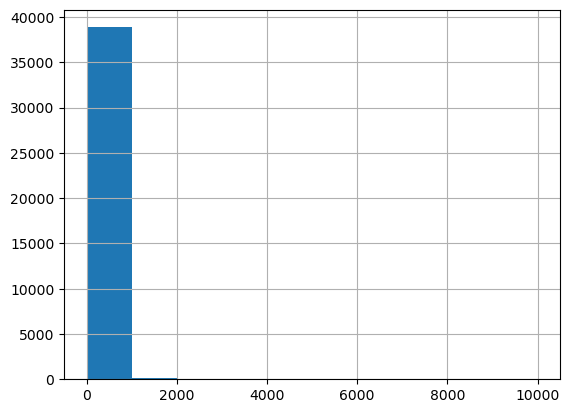

In [76]:
train['price'].hist()

In [77]:
train['price'].describe()

count    39116.000000
mean       153.057547
std        248.758522
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39102 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39100 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  last_review                     31063 non-null  object 
 12  reviews_per_month               

## 데이터 전처리 & 피처엔지니어링

In [79]:
# 결측치 처리
train.nunique()
#name, host_name, last_review 삭제 reviews_per_month-> 0

id                                39116
name                              38447
host_id                           30821
host_name                          9943
neighbourhood_group                   5
neighbourhood                       221
latitude                          17378
longitude                         13607
room_type                             3
minimum_nights                       94
number_of_reviews                   377
last_review                        1720
reviews_per_month                   903
calculated_host_listings_count       47
availability_365                    366
price                               638
dtype: int64

In [80]:
cols = ["name", "host_name", "last_review", "host_id"]
print(train.shape)
train = train.drop(cols, axis=1)
test = test.drop(cols, axis=1)
print(train.shape)

(39116, 16)
(39116, 12)


In [81]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
train.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

In [82]:
train = train.drop('id', axis=1)
test_id = test.pop('id')
test.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,Theater District,40.75965,-73.98652,Entire home/apt,29,0,0.00,327,338
1,Brooklyn,Bedford-Stuyvesant,40.68062,-73.94418,Entire home/apt,30,1,0.75,6,284
2,Brooklyn,Williamsburg,40.70665,-73.94061,Entire home/apt,4,50,0.51,1,331
3,Brooklyn,Bedford-Stuyvesant,40.68427,-73.95460,Private room,1,18,3.33,1,16
4,Manhattan,Harlem,40.82028,-73.95381,Private room,1,3,0.08,1,0


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             39116 non-null  object 
 1   neighbourhood                   39116 non-null  object 
 2   latitude                        39116 non-null  float64
 3   longitude                       39116 non-null  float64
 4   room_type                       39116 non-null  object 
 5   minimum_nights                  39116 non-null  int64  
 6   number_of_reviews               39116 non-null  int64  
 7   reviews_per_month               39116 non-null  float64
 8   calculated_host_listings_count  39116 non-null  int64  
 9   availability_365                39116 non-null  int64  
 10  price                           39116 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.3+ MB


In [84]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder

cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
le = LabelEncoder()

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train[cols]

,neighbourhood_group,neighbourhood,room_type
0,1,28,0
1,2,206,0
2,1,28,0
3,1,214,0
4,1,13,0
...,...,...,...
39111,1,214,1
39112,2,94,1
39113,1,19,0
39114,1,41,0


## 검증 데이터 분리

In [85]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train.drop('price', axis=1), train['price'], test_size=0.15, random_state=2022)

In [86]:
X_tr.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
35316,2,73,40.70417,-74.01511,0,9,0,0.00,1,15
8181,2,94,40.80317,-73.95559,0,1,2,1.22,1,85
12102,1,30,40.63672,-73.88814,0,2,43,1.18,1,309
17438,1,91,40.72409,-73.95039,0,5,5,1.17,4,68
32851,2,103,40.85961,-73.92911,1,3,1,0.12,2,107


## 모델 & 평가

In [87]:
# 평가
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def rmse(y_test, y_pred): #RMSE
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle(y_test, y_pred): #RMSLE
    return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))

def mape(y_test, y_pred): #MAPE
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print("r2 : ", r2_score(y_val, pred))
print("mae : ", mean_absolute_error(y_val, pred))
print("mse : ", mean_squared_error(y_val, pred))
print("rmse : ", rmse(y_val, pred))
print("rmsle : ", rmsle(y_val, pred))
print("mape : ", mape(y_val, pred))

r2 :  0.08452239774949599
mae :  73.98120907242296
mse :  44813.521129753644
rmse :  211.69204314228168
rmsle :  0.6284667216271868
mape :  58.8987034735162


/var/folders/2r/cx_5l5wj1lz_gqqbt1pvk3t40000gn/T/ipykernel_7944/42457448.py:8: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


## 예측 및 csv 제출

##정리

In [89]:
# y_test = pd.read_csv("y_test.csv")
# print(r2_score(y_test, pred))